In [1]:
import numpy as np
import keras
from keras import regularizers
from glob import glob
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
inceptionRes = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
inceptionRes.summary()

219070464/219055592 [==============================] - 4s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_____________

In [7]:
for layer in inceptionRes.layers:
  layer.trainable = False

In [8]:
x = Flatten()(inceptionRes.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inceptionRes.input, outputs=prediction)

In [9]:
for layer in model.layers:
    layer.kernel_regularizer = keras.regularizers.l1_l2(0.01)

In [10]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
train_path = '/content/drive/MyDrive/real vs fake/NEW_TRAIN_10K'
valid_path = '/content/drive/MyDrive/real vs fake/test'

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range=0.3,
                                   rotation_range=90,
                                   width_shift_range=0.3,
                                   #fill_mode='wrap',
                                   height_shift_range=0.3,
                                   #channel_shift_range=150.0,
                                   brightness_range=(0.1, 0.5),
                                   vertical_flip=True,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/NEW_TRAIN_10K',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 color_mode='rgb',
                                                 class_mode = 'binary')

Found 10000 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            color_mode='rgb',
                                            class_mode = 'binary')

Found 3000 images belonging to 2 classes.


In [15]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=2
)

In [16]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[reduce_lr]
)

Epoch 1/20
313/313 [==============================] - 4923s 16s/step - loss: 0.3120 - accuracy: 0.9111 - val_loss: 0.2269 - val_accuracy: 0.9363
Epoch 2/20
313/313 [==============================] - 1855s 6s/step - loss: 0.2139 - accuracy: 0.9443 - val_loss: 0.2033 - val_accuracy: 0.9500
Epoch 3/20
313/313 [==============================] - 1856s 6s/step - loss: 0.1627 - accuracy: 0.9600 - val_loss: 0.0706 - val_accuracy: 0.9830
Epoch 4/20
313/313 [==============================] - 1857s 6s/step - loss: 0.1752 - accuracy: 0.9603 - val_loss: 0.1000 - val_accuracy: 0.9770
Epoch 5/20
313/313 [==============================] - 1856s 6s/step - loss: 0.1871 - accuracy: 0.9604 - val_loss: 0.0649 - val_accuracy: 0.9870
Epoch 6/20
313/313 [==============================] - 1856s 6s/step - loss: 0.2070 - accuracy: 0.9622 - val_loss: 0.1253 - val_accuracy: 0.9800
Epoch 7/20
313/313 [==============================] - 1869s 6s/step - loss: 0.1765 - accuracy: 0.9686 - val_loss: 0.1820 - val_accuracy

In [17]:
import matplotlib.pyplot as plt

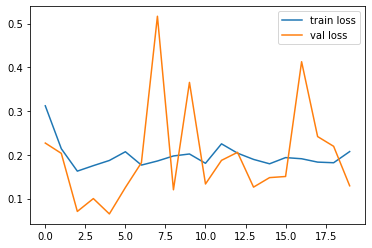

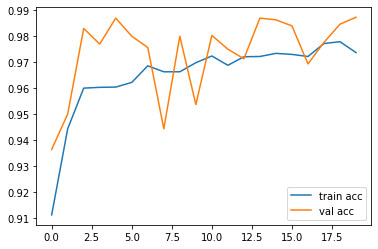

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')